<a href="https://colab.research.google.com/github/SimonGeb/Deep-Learning/blob/main/PSNR_and_SSIM_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import glob
import os
from PIL import Image
from skimage.metrics import structural_similarity
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TU Delft/Master/Deep Learning/Reproducability Project

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1DuKt88mVXJTHanb5KcuJgrsmJcTSkPkb/Reproducability Project


In [ ]:
# set directories here
res_dir = "result_Own_Adam_full/final"
gt_paths = glob.glob(res_dir + '/1*_gt.png')
out_paths = glob.glob(res_dir + '/1*_out.png')
print(gt_paths)
print(out_paths)

['result_Own_Adam_full/final/10093_00_300_gt.png', 'result_Own_Adam_full/final/10074_00_300_gt.png', 'result_Own_Adam_full/final/10077_00_300_gt.png', 'result_Own_Adam_full/final/10082_00_300_gt.png', 'result_Own_Adam_full/final/10087_00_300_gt.png', 'result_Own_Adam_full/final/10003_00_500_gt.png', 'result_Own_Adam_full/final/10003_00_800_gt.png', 'result_Own_Adam_full/final/10003_00_300_gt.png', 'result_Own_Adam_full/final/10004_00_300_gt.png', 'result_Own_Adam_full/final/10005_00_300_gt.png', 'result_Own_Adam_full/final/10004_00_500_gt.png', 'result_Own_Adam_full/final/10005_00_500_gt.png']
['result_Own_Adam_full/final/10093_00_300_out.png', 'result_Own_Adam_full/final/10074_00_300_out.png', 'result_Own_Adam_full/final/10077_00_300_out.png', 'result_Own_Adam_full/final/10082_00_300_out.png', 'result_Own_Adam_full/final/10087_00_300_out.png', 'result_Own_Adam_full/final/10003_00_500_out.png', 'result_Own_Adam_full/final/10003_00_800_out.png', 'result_Own_Adam_full/final/10003_00_300_

In [ ]:
def calculate_psnr(img1, img2, max_value=255):
    """"Calculating peak signal-to-noise ratio (PSNR) between two images."""
    mse = np.mean((np.array(img1, dtype=np.float32) - np.array(img2, dtype=np.float32).transpose(1, 0, 2)) ** 2)
    if mse == 0:
        return 100
    return 20 * np.log10(max_value / (np.sqrt(mse)))


calculate_psnr(output_image, gt_image, max_value=255)


4.19514466865914

In [ ]:
PSNRs = []
SSIMs = []

# calculate the PSNR and SSIM per image
for i in range(len(gt_paths)):
  gt_image = cv2.imread(gt_paths[i])
  output_image = cv2.imread(out_paths[i])
  try:
    PSNR = calculate_psnr(output_image, gt_image, max_value=255)
  except:
    # Rotate output if needed
    output_image = cv2.rotate(output_image, cv2.ROTATE_90_CLOCKWISE)
    PSNR = calculate_psnr(output_image, gt_image, max_value=255)
  PSNRs.append(PSNR)
  # Convert images to grayscale
  gt_gray = cv2.cvtColor(gt_image, cv2.COLOR_BGR2GRAY)
  output_gray = cv2.cvtColor(output_image, cv2.COLOR_BGR2GRAY)
  SSIM= structural_similarity(gt_gray, output_gray.T)
  SSIMs.append(SSIM)
  print(out_paths[i],": PSNR,SSIM: ", [PSNR,SSIM])

print("Average PSNR:",np.mean(PSNRs))
print("Average SSIM:",np.mean(SSIMs))



result_Own_Adam_full/final/10093_00_300_out.png : PSNR,SSIM:  [14.526778096675228, 0.47300528376979734]
result_Own_Adam_full/final/10074_00_300_out.png : PSNR,SSIM:  [16.374714448369197, 0.7237835562487207]
result_Own_Adam_full/final/10077_00_300_out.png : PSNR,SSIM:  [11.748678702023996, 0.4168993270018814]
result_Own_Adam_full/final/10082_00_300_out.png : PSNR,SSIM:  [10.870308039902579, 0.38727088680684285]
result_Own_Adam_full/final/10087_00_300_out.png : PSNR,SSIM:  [13.402153763564431, 0.6004905939348568]
result_Own_Adam_full/final/10003_00_500_out.png : PSNR,SSIM:  [4.013804812328672, 0.021773477638470175]
result_Own_Adam_full/final/10003_00_800_out.png : PSNR,SSIM:  [4.04025101094592, 0.02105599176931382]
result_Own_Adam_full/final/10003_00_300_out.png : PSNR,SSIM:  [4.19514466865914, 0.025691637935494584]
result_Own_Adam_full/final/10004_00_300_out.png : PSNR,SSIM:  [5.571514749463392, 0.03811644297925824]
result_Own_Adam_full/final/10005_00_300_out.png : PSNR,SSIM:  [9.035219

(600,)


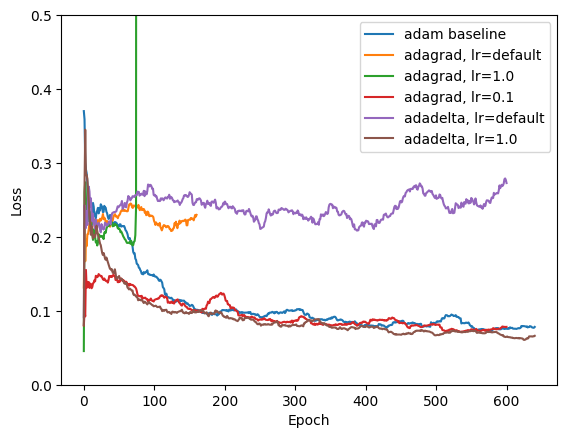

In [ ]:
adagrad = np.load("checkpoint/" +"Own_Adagrad/" "losses.npy")
adagrad2 = np.load("checkpoint/" +"Own_Adagrad_lr1/" "losses.npy")
adagrad3 = np.load("checkpoint/" +"Own_Adagrad_lr0.1/" "losses.npy")
adadelta1 = np.load("checkpoint/" +"Own_Adadelta/" "losses.npy")
adadelta2 = np.load("checkpoint/" +"Own_Adadelta_lr1/" "losses.npy")
baseline = np.load("checkpoint/" +"Own_Baseline/" "losses.npy")

print(adadelta1.shape)

plt.plot(np.linspace(0, len(baseline),len(baseline)), baseline, label = 'adam baseline')
plt.plot(np.linspace(0, len(adagrad),len(adagrad)), adagrad, label = 'adagrad, lr=default')
plt.plot(np.linspace(0, len(adagrad2),len(adagrad2)), adagrad2, label = 'adagrad, lr=1.0')
plt.plot(np.linspace(0, len(adagrad3),len(adagrad3)), adagrad3, label = 'adagrad, lr=0.1')
plt.plot(np.linspace(0, len(adadelta1),len(adadelta1)), adadelta1, label = 'adadelta, lr=default')
plt.plot(np.linspace(0, len(adadelta2),len(adadelta2)), adadelta2, label = 'adadelta, lr=1.0')

plt.xlabel("Epoch")
plt.ylabel("Loss")
ax = plt.gca()
ax.set_ylim([0, 0.5])
plt.legend()
plt.show()

(600,)


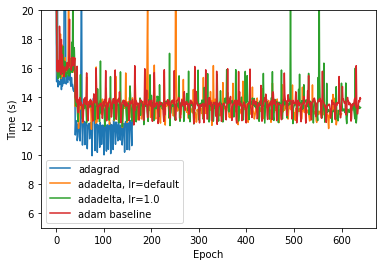

In [ ]:
adagrad_time = np.load("checkpoint/" +"Own_Adagrad/" "times.npy")
adadelta1_time = np.load("checkpoint/" +"Own_Adadelta/" "times.npy")
adadelta2_time = np.load("checkpoint/" +"Own_Adadelta_lr1/" "times.npy")
baseline_time = np.load("checkpoint/" +"Own_Baseline/" "times.npy")
print(adadelta1_time.shape)

plt.plot(np.linspace(0, len(adagrad_time),len(adagrad_time)), adagrad_time, label = 'adagrad')
plt.plot(np.linspace(0, len(adadelta1_time),len(adadelta1_time)), adadelta1_time, label = 'adadelta, lr=default')
plt.plot(np.linspace(0, len(adadelta2_time),len(adadelta2_time)), adadelta2_time, label = 'adadelta, lr=1.0')
plt.plot(np.linspace(0, len(baseline_time),len(baseline_time)), baseline_time, label = 'adam baseline')
plt.xlabel("Epoch")
plt.ylabel("Time (s)")
ax = plt.gca()

ax.set_ylim([5, 20])
plt.legend()
plt.show()

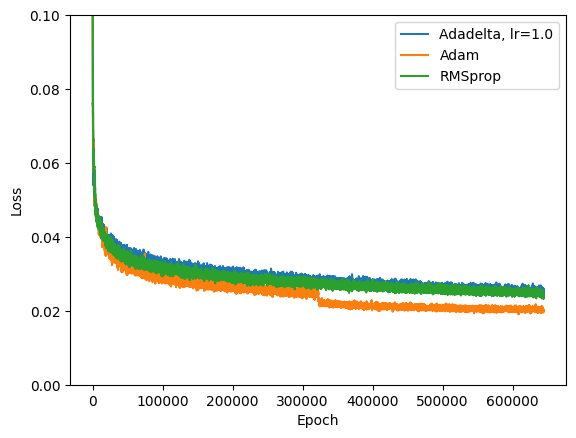

In [ ]:
adadelta_full = np.load("checkpoint/" +"Own_Adadelta_full/" "losses.npy")
adam_full = np.load("checkpoint/" +"Own_Adam_full/" "losses.npy")
RMSprop = np.load("checkpoint/" +"Own_RMSprop_full/" "losses.npy")
plt.plot(np.linspace(0, len(adadelta_full),len(adadelta_full)), adadelta_full, label = 'Adadelta, lr=1.0')
plt.plot(np.linspace(0, len(adam_full),len(adam_full)), adam_full, label = 'Adam')
plt.plot(np.linspace(0, len(RMSprop),len(RMSprop)), RMSprop, label = 'RMSprop')

plt.xlabel("Epoch")
plt.ylabel("Loss")
ax = plt.gca()
ax.set_ylim([0, 0.1])
plt.legend()
plt.show()

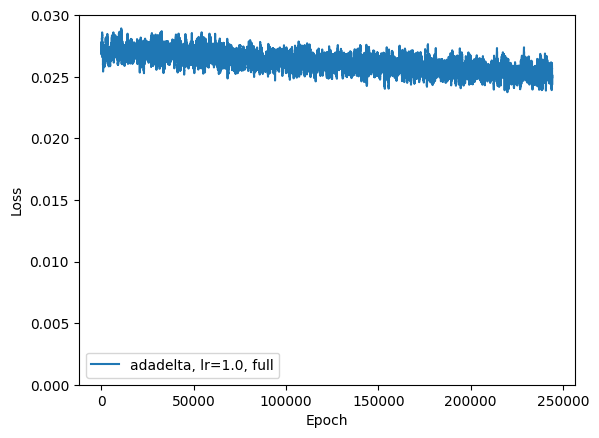

In [ ]:
adadelta_full = np.load("checkpoint/" +"Own_Adadelta_full/" "losses.npy")[400000:]
plt.plot(np.linspace(0, len(adadelta_full),len(adadelta_full)), adadelta_full, label = 'adadelta, lr=1.0, full')

plt.xlabel("Epoch")
plt.ylabel("Loss")
ax = plt.gca()
ax.set_ylim([0, 0.03])
plt.legend()
plt.show()

(600,)


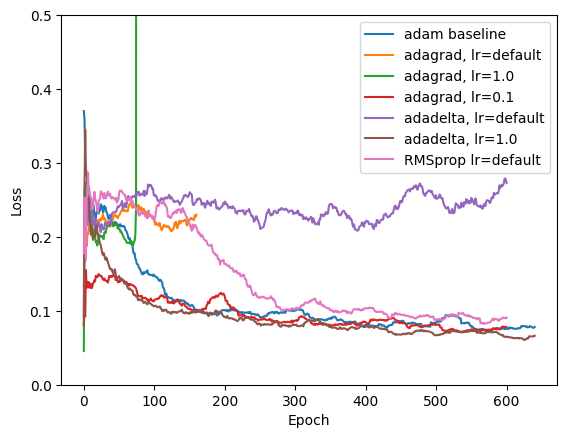

In [ ]:
adagrad = np.load("checkpoint/" +"Own_Adagrad/" "losses.npy")
adagrad2 = np.load("checkpoint/" +"Own_Adagrad_lr1/" "losses.npy")
adagrad3 = np.load("checkpoint/" +"Own_Adagrad_lr0.1/" "losses.npy")
adadelta1 = np.load("checkpoint/" +"Own_Adadelta/" "losses.npy")
adadelta2 = np.load("checkpoint/" +"Own_Adadelta_lr1/" "losses.npy")
baseline = np.load("checkpoint/" +"Own_Baseline/" "losses.npy")
RMSprop = np.load("checkpoint/" +"RMSprop/" "losses.npy")
RMSprop_baseline = np.load("checkpoint/" +"RMSprop_baseline/" "losses.npy")
RMSprop_lr1 = np.load("checkpoint/" +"RMSprop_lr1/" "losses.npy")

print(adadelta1.shape)

plt.plot(np.linspace(0, len(baseline),len(baseline)), baseline, label = 'adam baseline')
plt.plot(np.linspace(0, len(adagrad),len(adagrad)), adagrad, label = 'adagrad, lr=default')
plt.plot(np.linspace(0, len(adagrad2),len(adagrad2)), adagrad2, label = 'adagrad, lr=1.0')
plt.plot(np.linspace(0, len(adagrad3),len(adagrad3)), adagrad3, label = 'adagrad, lr=0.1')
plt.plot(np.linspace(0, len(adadelta1),len(adadelta1)), adadelta1, label = 'adadelta, lr=default')
plt.plot(np.linspace(0, len(adadelta2),len(adadelta2)), adadelta2, label = 'adadelta, lr=1.0')
plt.plot(np.linspace(0, len(RMSprop_baseline),len(RMSprop_baseline)), RMSprop_baseline, label = 'RMSprop lr=default')

plt.xlabel("Epoch")
plt.ylabel("Loss")
ax = plt.gca()
ax.set_ylim([0, 0.5])
plt.legend()
plt.show()

(600,)


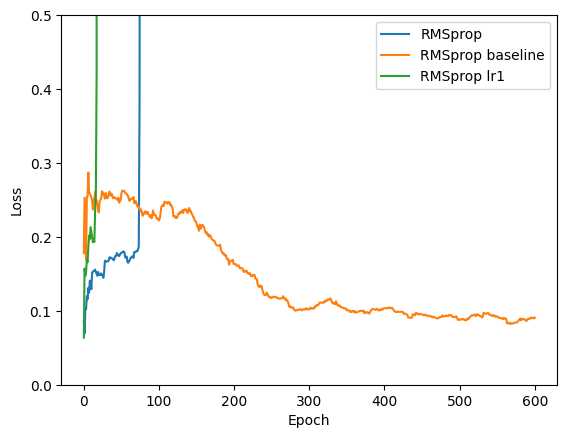

In [ ]:
RMSprop = np.load("checkpoint/" +"RMSprop/" "losses.npy")
RMSprop_baseline = np.load("checkpoint/" +"RMSprop_baseline/" "losses.npy")
RMSprop_lr1 = np.load("checkpoint/" +"RMSprop_lr1/" "losses.npy")

print(RMSprop_baseline.shape)
#baseline lr = 1e-4

plt.plot(np.linspace(0, len(RMSprop),len(RMSprop)), RMSprop, label = 'RMSprop, lr = 0.001')
plt.plot(np.linspace(0, len(RMSprop_baseline),len(RMSprop_baseline)), RMSprop_baseline, label = 'RMSprop baseline')
plt.plot(np.linspace(0, len(RMSprop_lr1),len(RMSprop_lr1)), RMSprop_lr1, label = 'RMSprop, lr = 1.0')
plt.xlabel("Epoch")
plt.ylabel("Loss")
ax = plt.gca()
ax.set_ylim([0, 0.5])
plt.legend()
plt.show()

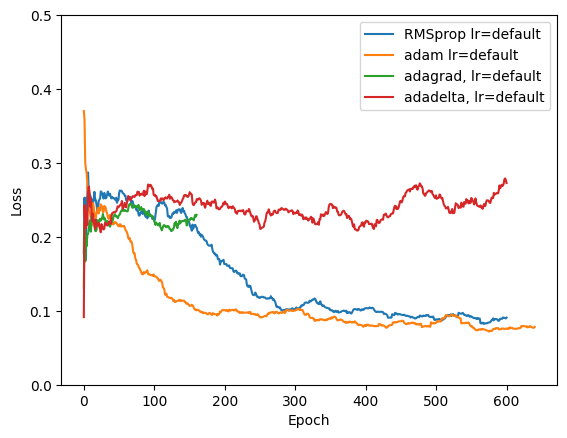

In [ ]:
plt.plot(np.linspace(0, len(RMSprop_baseline),len(RMSprop_baseline)), RMSprop_baseline, label = 'RMSprop lr=default')
plt.plot(np.linspace(0, len(baseline),len(baseline)), baseline, label = 'adam lr=default')
plt.plot(np.linspace(0, len(adagrad),len(adagrad)), adagrad, label = 'adagrad, lr=default')
plt.plot(np.linspace(0, len(adadelta1),len(adadelta1)), adadelta1, label = 'adadelta, lr=default') 

plt.xlabel("Epoch")
plt.ylabel("Loss")
ax = plt.gca()
ax.set_ylim([0, 0.5])
plt.legend()
plt.show()